# #Datacleaningchallenge
#### By Akintola Malik Olasubomi
#### Date : 10th March 2023

**Table of Contents**
- [Introduction](#intro)
- [Gathering and Importing](#step1)
- [Data Assessment](#step2)
- [Observations](#obs)
- [Data Cleaning](#step3)
- [Exploratory Data Analysis](#step4)
- [Conclusions](#conc)
- [References](#ref)

<a id='intro'></a>
## INTRODUCTION 

In this project, I will be cleaning a very messy data and also try to perform some analysis on it. The dataset is on the list of all fifa rated players from the year 1998 to 2023. The data contains **18,979 Records** and **77 Columns**. Details on some of the columns are given below;

- `ID`: Players unique Identity number.
- `Height`: Players height
- `Weight`: Players weight in lbs
- `Foot`: Players strong foot
- `BOV`: Best Overall: Ability of player to hold the comfortably to his feet by percentage rating.
- `BP`: Ball position: position at which a player possess the ball the most. 
- `Photo_url`: link to the picture of the player's picture.
- `LongName`: Players name. Some are in full and some are short. work on it. 
- `Playerurl`: Link to players site.
- `Nationality`: Player's country of origin.
- `Position`: The wing or position the player has ever played. Be careful while working on this column
- `Name`: Another column for the name of the player. Notice the some name contains an irregular character. Work on it .
- `Age`: Players age. Check the datatype of this column
- `OVA`: Players overall analysis or rate in percentage
- `POT`: Players potential in percentage
- `Team and Contract`: This column is completely empty so you can drop it!
- `Growth`: improvement in the game attribute
- `Joined`: Date at which player started National team
- `Value`: players worth in Dollars.
- `Wage`: weekly salary in Dollars 
- `Release clause`: This is the amount in players contract required for the player to leave to another club, also in dollars.
- `FK` : Free Kick
- `GK`: Goal Keeper 
- `SM`: Skill Moves rating
- `A/W`: Attacking work rate 
- `D/W`: Defensive work rate
- `W/F`: W/F" refers to a player's weak foot rating. It is a measure of how well a player can use their non-dominant foot to pass, shoot or dribble. The rating is given on a scale of 1 to 5
- `IR`: Injury rating also given on a scale of 1 to 5 
- `PAS`: Pass accuracy given on a 100 rating
- `SHO`: Shooting Attribute.
- `PAC`: Pace 

I will be making use of python and excel for my programmatic assessment and visual assessment respectively. 

In [1]:
# Importing all necessary packages
from zipfile import ZipFile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='step1'></a>
## Gathering and Importing

The data is given in a zipped folder called "archive.zip" , so I will be making use of the *Zipfile* module to extract the files to the current working directory

In [8]:
# loading the archive.zip and creating a zip object
with ZipFile("C:\\Users\\malik\\Documents\\Data\\#DataCleaningChallenge\\archive.zip", 'r') as zObject:
    # Extracting all the members of the zip 
    zObject.extractall()

In [12]:
# Gets and prints the list of all files and directories
print(os.listdir())

['#DataCleaningChallenge FIFA Dataset Dictionary.pptx', '.ipynb_checkpoints', 'archive.zip', 'datachallengemeetingslide.pptx', 'fifa21 raw data v2.csv', 'fifa21_raw_data.csv', 'Untitled.ipynb', '~$#DataCleaningChallenge FIFA Dataset Dictionary.pptx']


The file of interest is the "fifa21 raw data v2.csv" file.
Now, I will read the data into a pandas dataframe object named **fifa_df**.

In [2]:
# Reading the data into a datafraame
fifa_df = pd.read_csv('fifa21 raw data v2.csv')

C:\Users\malik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<a id = 'step2'></a>
## Data Assessment

In [3]:
# Checking the first five records
fifa_df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [4]:
# The how many rows and columns are present in the data
fifa_df.shape

(18979, 77)

This gives 18,979 records and 77 attributes as mentioned earlier.

In [5]:
#checking the info on each column
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [6]:
# checking the statistics of the quantitative columns
fifa_df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,...,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,...,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.000000,63.000000,62.000000,64.000000,68.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,259216.000000,53.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,94.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [7]:
# Check for duplicate IDs
sum(fifa_df.ID.duplicated())

0

In [8]:
#Checking if there are values that are not in cm in the height column
fifa_df[~ fifa_df.Height.str.contains('cm')].Height

793     6'2"
847     6'3"
848     6'5"
860    5'11"
861     6'4"
862     6'1"
863     6'0"
864     6'1"
865    5'11"
866     6'2"
867     6'0"
868     6'3"
869     6'0"
871    5'10"
872     5'9"
873    5'11"
874     5'6"
875     6'1"
876     6'0"
877     6'4"
878     5'7"
879     6'0"
880    5'11"
881    5'11"
883     6'0"
884    5'10"
885     6'3"
886     6'0"
887     5'4"
888    5'11"
889     5'9"
890     5'7"
891     6'0"
892    5'10"
893     6'2"
894     6'2"
895     6'3"
896     5'7"
897    5'10"
898     5'9"
Name: Height, dtype: object

In [9]:
#Checking if there are values that are not in kg in the weight column
fifa_df[~ fifa_df.Weight.str.contains('kg')].Weight

793    183lbs
847    179lbs
848    183lbs
860    172lbs
861    196lbs
862    176lbs
863    185lbs
864    179lbs
865    170lbs
866    196lbs
867    172lbs
868    203lbs
869    183lbs
871    168lbs
872    161lbs
873    146lbs
874    130lbs
875    190lbs
876    172lbs
877    174lbs
878    148lbs
879    165lbs
880    172lbs
881    161lbs
883    159lbs
884    170lbs
885    192lbs
886    181lbs
887    139lbs
888    154lbs
889    168lbs
890    170lbs
891    165lbs
892    157lbs
893    159lbs
894    181lbs
895    179lbs
896    148lbs
897    170lbs
898    163lbs
Name: Weight, dtype: object

In [10]:
# Checking the issue with the joined column
fifa_df.Joined

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

In [11]:
#Checking the contents of the value column
fifa_df.Value

0        €103.5M
1           €63M
2          €120M
3          €129M
4          €132M
          ...   
18974      €100K
18975      €130K
18976      €120K
18977      €100K
18978      €100K
Name: Value, Length: 18979, dtype: object

In [12]:
#Checking to see if there are any other currency in the values, Wage, and Release Clause columns
print(fifa_df[~fifa_df.Value.str.contains('€')].shape[0])
print(fifa_df[~fifa_df.Wage.str.contains('€')].shape[0])
print(fifa_df[~fifa_df['Release Clause'].str.contains('€')].shape[0])

0
0
0


In [13]:
sum(fifa_df.ID.duplicated())

0

<a id='obs'></a>
## Observation

**Data Type Issues**
1. The `ID` column should be *object* not *int64*
2. The columns `Height` and `Weight`, `Value`, `Wage` and `Release Clause`, `W/F`, `SM`, `IR`, `Hits` should be *int64* not *object*
3. The columns `Joined` and `Loan date end`should be *date* not *object*

**Data Content Issues**

4. Some values in the `Height` column are in feet and not cm
5. Some values in the `Weight` column are in lbs and not kg
6. The values in the `Positions` column are not sorted. Hence they appear as different values. E.g "CB, RB" and "RB, CB".
7. The `Values`, `Release Clause` and `Hits` column contains sumarized figures

<a id = 'step3'></a>
## Data Cleaning

I am going to be dividing the dataset by the columns into the clean and dirty columns. I can later join them using the ID column as that would make my work easier

In [281]:
# Create a copy of the data
fifa = fifa_df.copy()

In [282]:
# Creating a new dataframe for the columns with the dirty data
fifa_dirty = fifa[['ID', 'Joined', 'Loan Date End', 'Height', 'Weight', 'Value', 'Release Clause','Positions', 'W/F', 'SM', 'IR', 'Hits']]

# Creating a new dataframe for the columns with the clean data
fifa_clean = fifa.drop(['Joined', 'Loan Date End', 'Height', 'Weight', 'Value', 'Release Clause','Positions', 'W/F', 'SM', 'IR', 'Hits'], axis = 1)

In [283]:
fifa_dirty.head()

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,Positions,W/F,SM,IR,Hits
0,158023,"Jul 1, 2004",NaN,170cm,72kg,€103.5M,€138.4M,"RW, ST, CF",4 ★,4★,5 ★,771
1,20801,"Jul 10, 2018",NaN,187cm,83kg,€63M,€75.9M,"ST, LW",4 ★,5★,5 ★,562
2,200389,"Jul 16, 2014",NaN,188cm,87kg,€120M,€159.4M,GK,3 ★,1★,3 ★,150
3,192985,"Aug 30, 2015",NaN,181cm,70kg,€129M,€161M,"CAM, CM",5 ★,4★,4 ★,207
4,190871,"Aug 3, 2017",NaN,175cm,68kg,€132M,€166.5M,"LW, CAM",5 ★,5★,5 ★,595


In [284]:
fifa_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              18979 non-null  int64 
 1   Joined          18979 non-null  object
 2   Loan Date End   1013 non-null   object
 3   Height          18979 non-null  object
 4   Weight          18979 non-null  object
 5   Value           18979 non-null  object
 6   Release Clause  18979 non-null  object
 7   Positions       18979 non-null  object
 8   W/F             18979 non-null  object
 9   SM              18979 non-null  object
 10  IR              18979 non-null  object
 11  Hits            16384 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.7+ MB


### Cleaning the `Joined`  and `Loan Date End` Columns
**Issue:** Wrong Datatype.

**Solution:** Change dataype from object to datetime64


In [285]:
def changetype(df, col, new):
    df[col] = df[col].astype(new)

In [286]:
changetype(fifa_dirty, 'Joined', 'datetime64')

<ipython-input-285-beb03c17bd10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(new)


In [287]:
fifa_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              18979 non-null  int64         
 1   Joined          18979 non-null  datetime64[ns]
 2   Loan Date End   1013 non-null   object        
 3   Height          18979 non-null  object        
 4   Weight          18979 non-null  object        
 5   Value           18979 non-null  object        
 6   Release Clause  18979 non-null  object        
 7   Positions       18979 non-null  object        
 8   W/F             18979 non-null  object        
 9   SM              18979 non-null  object        
 10  IR              18979 non-null  object        
 11  Hits            16384 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.7+ MB


In [288]:
fifa_dirty.head()

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,Positions,W/F,SM,IR,Hits
0,158023,2004-07-01,NaN,170cm,72kg,€103.5M,€138.4M,"RW, ST, CF",4 ★,4★,5 ★,771
1,20801,2018-07-10,NaN,187cm,83kg,€63M,€75.9M,"ST, LW",4 ★,5★,5 ★,562
2,200389,2014-07-16,NaN,188cm,87kg,€120M,€159.4M,GK,3 ★,1★,3 ★,150
3,192985,2015-08-30,NaN,181cm,70kg,€129M,€161M,"CAM, CM",5 ★,4★,4 ★,207
4,190871,2017-08-03,NaN,175cm,68kg,€132M,€166.5M,"LW, CAM",5 ★,5★,5 ★,595


In [289]:
fifa_dirty[~fifa_dirty['Loan Date End'].isna()]

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,Positions,W/F,SM,IR,Hits
205,173731,2013-09-01,"Jun 30, 2021",185cm,82kg,€35M,€0,RW,3 ★,4★,4 ★,282
248,193105,2010-07-01,"Jun 30, 2021",195cm,94kg,€32M,€0,GK,3 ★,1★,2 ★,94
254,200888,2015-07-02,"Jun 30, 2021",188cm,83kg,€27M,€0,"CDM, CM",3 ★,3★,3 ★,285
302,216409,2019-07-01,"Jun 30, 2021",171cm,67kg,€28M,€0,"RM, RW, ST",4 ★,4★,2 ★,93
306,223959,2018-07-12,"Jun 30, 2021",166cm,60kg,€33.5M,€0,"CDM, CM",3 ★,3★,2 ★,194
...,...,...,...,...,...,...,...,...,...,...,...,...
18472,242601,2018-02-13,"Aug 31, 2021",182cm,72kg,€190K,€0,ST,3 ★,3★,1 ★,NaN
18571,236818,2019-07-12,"Jun 30, 2021",178cm,64kg,€140K,€0,"CM, RW, LW",4 ★,2★,1 ★,NaN
18600,240392,2017-07-14,"Dec 31, 2020",181cm,65kg,€130K,€0,CM,3 ★,2★,1 ★,NaN
18622,252516,2019-07-25,"Dec 31, 2020",177cm,68kg,€130K,€0,"CAM, LM",4 ★,2★,1 ★,NaN


In [290]:
changetype(fifa_dirty, 'Loan Date End', 'datetime64')

<ipython-input-285-beb03c17bd10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(new)


In [291]:
fifa_dirty[~fifa_dirty['Loan Date End'].isna()]

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,Positions,W/F,SM,IR,Hits
205,173731,2013-09-01,2021-06-30,185cm,82kg,€35M,€0,RW,3 ★,4★,4 ★,282
248,193105,2010-07-01,2021-06-30,195cm,94kg,€32M,€0,GK,3 ★,1★,2 ★,94
254,200888,2015-07-02,2021-06-30,188cm,83kg,€27M,€0,"CDM, CM",3 ★,3★,3 ★,285
302,216409,2019-07-01,2021-06-30,171cm,67kg,€28M,€0,"RM, RW, ST",4 ★,4★,2 ★,93
306,223959,2018-07-12,2021-06-30,166cm,60kg,€33.5M,€0,"CDM, CM",3 ★,3★,2 ★,194
...,...,...,...,...,...,...,...,...,...,...,...,...
18472,242601,2018-02-13,2021-08-31,182cm,72kg,€190K,€0,ST,3 ★,3★,1 ★,NaN
18571,236818,2019-07-12,2021-06-30,178cm,64kg,€140K,€0,"CM, RW, LW",4 ★,2★,1 ★,NaN
18600,240392,2017-07-14,2020-12-31,181cm,65kg,€130K,€0,CM,3 ★,2★,1 ★,NaN
18622,252516,2019-07-25,2020-12-31,177cm,68kg,€130K,€0,"CAM, LM",4 ★,2★,1 ★,NaN


### Cleaning the `Height`  and `Weight` Columns
**Issue:** Inconsistency in the metric unit.

**Solution:** make the metric unit consistent by converting feet to cm and lbs to kg

In [292]:
#Checking the records with height in feet 
fifa_dirty[~fifa_dirty.Height.str.contains('cm')]

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,Positions,W/F,SM,IR,Hits
793,110677,2018-02-27,NaT,"6'2""",183lbs,€1.7M,€3.6M,GK,2 ★,1★,2 ★,14
847,166706,2020-08-20,NaT,"6'3""",179lbs,€3.1M,€5.9M,CB,2 ★,2★,3 ★,22
848,189068,2019-08-26,NaT,"6'5""",183lbs,€9.5M,€16.2M,ST,3 ★,2★,3 ★,33
860,198031,2015-07-01,NaT,"5'11""",172lbs,€10.5M,€21M,CM,3 ★,3★,1 ★,41
861,190243,2018-07-01,NaT,"6'4""",196lbs,€6.5M,€11.1M,GK,3 ★,1★,2 ★,17
862,194222,2014-07-11,NaT,"6'1""",176lbs,€8.5M,€17.9M,CB,3 ★,2★,1 ★,3
863,194209,2019-07-06,NaT,"6'0""",185lbs,€6.5M,€13.7M,ST,4 ★,3★,2 ★,8
864,193601,2018-07-01,NaT,"6'1""",179lbs,€8.5M,€14.5M,CB,3 ★,2★,1 ★,20
865,193352,2020-08-19,NaT,"5'11""",170lbs,€9M,€15.3M,LB,3 ★,3★,3 ★,36
866,193152,2012-07-01,NaT,"6'2""",196lbs,€6.5M,€13.7M,GK,3 ★,1★,1 ★,11


In [293]:
#replacing every double quote with nothing
fifa_dirty.Height = fifa_dirty.Height.str.replace('"', '')

C:\Users\malik\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [294]:
fifa_dirty[~fifa_dirty.Height.str.contains('cm')]

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,Positions,W/F,SM,IR,Hits
793,110677,2018-02-27,NaT,6'2,183lbs,€1.7M,€3.6M,GK,2 ★,1★,2 ★,14
847,166706,2020-08-20,NaT,6'3,179lbs,€3.1M,€5.9M,CB,2 ★,2★,3 ★,22
848,189068,2019-08-26,NaT,6'5,183lbs,€9.5M,€16.2M,ST,3 ★,2★,3 ★,33
860,198031,2015-07-01,NaT,5'11,172lbs,€10.5M,€21M,CM,3 ★,3★,1 ★,41
861,190243,2018-07-01,NaT,6'4,196lbs,€6.5M,€11.1M,GK,3 ★,1★,2 ★,17
862,194222,2014-07-11,NaT,6'1,176lbs,€8.5M,€17.9M,CB,3 ★,2★,1 ★,3
863,194209,2019-07-06,NaT,6'0,185lbs,€6.5M,€13.7M,ST,4 ★,3★,2 ★,8
864,193601,2018-07-01,NaT,6'1,179lbs,€8.5M,€14.5M,CB,3 ★,2★,1 ★,20
865,193352,2020-08-19,NaT,5'11,170lbs,€9M,€15.3M,LB,3 ★,3★,3 ★,36
866,193152,2012-07-01,NaT,6'2,196lbs,€6.5M,€13.7M,GK,3 ★,1★,1 ★,11


In [295]:
def height_ft(x):
    ''' Converts the values in feets and inches to centimeter'''
    if not'cm' in x:
        num = x.split("'")
        num_1 = int(num[0])
        num_2 = int(num[1])

        ans = int(round(((num_1 * 12) + num_2) * 2.54, 0))
        return str(ans)
    else :
        #removes the cm
        return x[:-2]

In [296]:
# Applying the function on the height column to convert the necessary values to cm
fifa_dirty.Height = fifa_dirty.Height.apply(height_ft)

C:\Users\malik\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [297]:
#checking if the value has been converted to cm
fifa_dirty.Height.iloc[793]

'188'

Now for the weight column

In [298]:
fifa_dirty[~fifa_dirty.Weight.str.contains('kg')]

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,Positions,W/F,SM,IR,Hits
793,110677,2018-02-27,NaT,188,183lbs,€1.7M,€3.6M,GK,2 ★,1★,2 ★,14
847,166706,2020-08-20,NaT,190,179lbs,€3.1M,€5.9M,CB,2 ★,2★,3 ★,22
848,189068,2019-08-26,NaT,196,183lbs,€9.5M,€16.2M,ST,3 ★,2★,3 ★,33
860,198031,2015-07-01,NaT,180,172lbs,€10.5M,€21M,CM,3 ★,3★,1 ★,41
861,190243,2018-07-01,NaT,193,196lbs,€6.5M,€11.1M,GK,3 ★,1★,2 ★,17
862,194222,2014-07-11,NaT,185,176lbs,€8.5M,€17.9M,CB,3 ★,2★,1 ★,3
863,194209,2019-07-06,NaT,183,185lbs,€6.5M,€13.7M,ST,4 ★,3★,2 ★,8
864,193601,2018-07-01,NaT,185,179lbs,€8.5M,€14.5M,CB,3 ★,2★,1 ★,20
865,193352,2020-08-19,NaT,180,170lbs,€9M,€15.3M,LB,3 ★,3★,3 ★,36
866,193152,2012-07-01,NaT,188,196lbs,€6.5M,€13.7M,GK,3 ★,1★,1 ★,11


In [299]:
def weight_ft(x):
    ''' Converts the values in lbs to kilogram'''
    if not'kg' in x:
        x = x[:-3]
        # converts value to kg
        ans = int(round(int(x) * 0.453592, 0))
        return str(ans)
    else :
        #removes the kg
        return x[:-3]

In [300]:
#applying the conversion on the weight column
fifa_dirty.Weight = fifa_dirty.Weight.apply(weight_ft)

C:\Users\malik\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [301]:
fifa_dirty.Weight.iloc[793]

'83'

### Cleaning the `Positions` Column 
**Issue:** The values are not sorted, hence, they appear as different categories.

**Solution:** Sort the values in aplphabetical order


In [302]:
# Checking the positions column
fifa_dirty.Positions.head(30)

0      RW, ST, CF
1          ST, LW
2              GK
3         CAM, CM
4         LW, CAM
5              ST
6              RW
7              GK
8      ST, LW, RW
9              GK
10             CB
11             LW
12            CDM
13             GK
14             GK
15         CF, ST
16             CB
17             ST
18         LW, RW
19        CDM, CM
20        CDM, RB
21        CF, CAM
22             GK
23             ST
24             GK
25             CB
26         LW, ST
27             CM
28     ST, CF, LW
29    RM, LM, CAM
Name: Positions, dtype: object

In [303]:
# try a groupby to see how many distinct categories it thinks are there
fifa_dirty.groupby('Positions').count().ID

Positions
CAM             245
CAM, CDM         13
CAM, CDM, CM      6
CAM, CDM, LM      1
CAM, CF          23
               ... 
ST, RW, CM        1
ST, RW, LM        1
ST, RW, LW       41
ST, RW, RM        4
ST, RWB           2
Name: ID, Length: 640, dtype: int64

It thinks there are 640 different categories

In [304]:
# Sorting the Positions column
fifa_dirty.Positions = fifa_dirty.Positions.apply(lambda x: ','.join(sorted(x.replace(' ', ''))))

In [305]:
# check the categories now using a groupby
fifa_dirty.groupby('Positions').count()

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,W/F,SM,IR,Hits
Positions,,,,,,,,,,,
",,,,A,B,C,C,C,M,M",2,2,0,2,2,2,2,2,2,2,2
",,,,A,B,C,C,L,M,M",1,1,0,1,1,1,1,1,1,1,1
",,,,A,B,C,C,M,M,R",3,3,0,3,3,3,3,3,3,3,1
",,,,A,B,C,C,M,M,R,W",1,1,0,1,1,1,1,1,1,1,1
",,,,A,B,C,C,M,S,T",1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
"L,M",244,244,16,244,244,244,244,244,244,244,201
"L,W",114,114,3,114,114,114,114,114,114,114,86
"M,R",262,262,10,262,262,262,262,262,262,262,206


The most popularly played multiple postions have now been reduced to 224 categories

### Cleaning the `Values` and `Hits` Column
**Issue:** values are summarised.

**Solution:** Unsummarise values

In [306]:
fifa_dirty.Value

0        €103.5M
1           €63M
2          €120M
3          €129M
4          €132M
          ...   
18974      €100K
18975      €130K
18976      €120K
18977      €100K
18978      €100K
Name: Value, Length: 18979, dtype: object

In [307]:
#checking for values without m or k
fifa_dirty[~fifa_dirty.Value.str.contains('M|K')]

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,Positions,W/F,SM,IR,Hits
289,230347,2019-01-01,NaT,178,6,€0,€0,",,B,L,L,M",4 ★,4★,1 ★,172
292,230225,2019-01-01,NaT,181,8,€0,€0,",,B,C,C,D,M",3 ★,2★,1 ★,75
369,245299,2018-08-10,NaT,181,8,€0,€0,",,B,C,C,D,M",3 ★,2★,1 ★,11
374,245294,2018-08-10,NaT,190,8,€0,€0,"G,K",2 ★,1★,1 ★,18
375,245308,2018-08-10,NaT,178,6,€0,€0,",,B,L,L,M",4 ★,4★,1 ★,17
...,...,...,...,...,...,...,...,...,...,...,...,...
17220,247059,2018-07-01,NaT,172,6,€0,€0,"B,R",3 ★,2★,1 ★,NaN
17343,251734,2019-07-12,NaT,168,6,€0,€0,",,C,M,M,R",3 ★,3★,1 ★,NaN
17659,251738,2019-07-12,NaT,178,7,€0,€0,"S,T",1 ★,2★,1 ★,NaN
17661,251741,2019-07-12,NaT,175,7,€0,€0,",,,,A,B,C,M,M,R,R",3 ★,2★,1 ★,NaN


In [308]:
# number of unique values without m or k 
fifa_dirty[~fifa_dirty.Value.str.contains('M|K')].Value.unique()

array(['€0'], dtype=object)

In [309]:
fifa_dirty.Value = fifa_dirty.Value.apply(lambda x: 
                                          float(x[1:-1]) * 1000000 if 'M' in x 
                                            else (float(x[1:-1]) * 1000 if 'K' in x 
                                            else 0
                                                 )
                                         )

C:\Users\malik\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [310]:
# checking the value column to make sure changes have been effected
fifa_dirty.Value

0        103500000.0
1         63000000.0
2        120000000.0
3        129000000.0
4        132000000.0
            ...     
18974       100000.0
18975       130000.0
18976       120000.0
18977       100000.0
18978       100000.0
Name: Value, Length: 18979, dtype: float64

**Now for `Release clause` column**

In [317]:
# Checking the release clause column
fifa_dirty['Release Clause']

0        €138.4M
1         €75.9M
2        €159.4M
3          €161M
4        €166.5M
          ...   
18974       €70K
18975      €165K
18976      €131K
18977       €88K
18978       €79K
Name: Release Clause, Length: 18979, dtype: object

In [318]:
# unsummarizing the values in the release clause columns
fifa_dirty['Release Clause'] = fifa_dirty['Release Clause'].apply(lambda x: 
                                          float(x[1:-1]) * 1000000 if 'M' in x 
                                            else (float(x[1:-1]) * 1000 if 'K' in x 
                                            else 0
                                                 )
                                         )

<ipython-input-318-49e99769421a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_dirty['Release Clause'] = fifa_dirty['Release Clause'].apply(lambda x:


In [319]:
# Checking to confirm the change has been effected
fifa_dirty['Release Clause']

0        138400000.0
1         75900000.0
2        159400000.0
3        161000000.0
4        166500000.0
            ...     
18974        70000.0
18975       165000.0
18976       131000.0
18977        88000.0
18978        79000.0
Name: Release Clause, Length: 18979, dtype: float64

**Now we do something similar for the `Hits` column**

In [311]:
#checking a sample already seen in excel
fifa_dirty.Hits[8]

'1.6K'

In [312]:
def unsummarise(x):
    x = str(x)
    if 'M' in x:
        x = x[:-1]
        ans = float(x) * 1000000
    elif 'K' in x:
        x = x[:-1]
        ans = float(x) * 1000
    else: 
        ans = x
    return ans


fifa_dirty.Hits = fifa_dirty.Hits.apply(unsummarise)

In [313]:
#Confirming the change has been effected
fifa_dirty.Hits[8]

1600.0

In [337]:
#replacing the nan
fifa_dirty.Hits = fifa_dirty.Hits.str.replace('nan', '')

C:\Users\malik\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Cleaning the W/F, SM, and the IR Columns
**Issue:** They contain an irregular character ★

**Solution:** Remove such characters

In [314]:
#checking if there are values without the ★ symbol
print(sum(~fifa_dirty.IR.str.contains('★')))
print(sum(~fifa_dirty['W/F'].str.contains('★')))
print(sum(~fifa_dirty.SM.str.contains('★')))

0
0
0


All values contain the star

In [315]:
#To remove the stars
fifa_dirty['W/F'] = fifa_dirty['W/F'].str.replace('★','')
fifa_dirty.SM = fifa_dirty.SM.str.replace('★', '')
fifa_dirty.IR = fifa_dirty.IR.str.replace('★', '')

<ipython-input-315-be0de59e2bbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_dirty['W/F'] = fifa_dirty['W/F'].str.replace('★','')


In [320]:
fifa_dirty

,ID,Joined,Loan Date End,Height,Weight,Value,Release Clause,Positions,W/F,SM,IR,Hits
0,158023,2004-07-01,NaT,170,7,103500000.0,138400000.0,",,,,C,F,R,S,T,W",4,4,5,771
1,20801,2018-07-10,NaT,187,8,63000000.0,75900000.0,",,L,S,T,W",4,5,5,562
2,200389,2014-07-16,NaT,188,8,120000000.0,159400000.0,"G,K",3,1,3,150
3,192985,2015-08-30,NaT,181,7,129000000.0,161000000.0,",,A,C,C,M,M",5,4,4,207
4,190871,2017-08-03,NaT,175,6,132000000.0,166500000.0,",,A,C,L,M,W",5,5,5,595
...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,2018-07-13,NaT,178,6,100000.0,70000.0,"B,C",2,2,1,nan
18975,258760,2020-08-01,NaT,175,6,130000.0,165000.0,"C,M",2,2,1,nan
18976,252757,2019-03-08,NaT,179,7,120000.0,131000.0,"C,M",2,2,1,nan
18977,243790,2020-09-22,NaT,175,6,100000.0,88000.0,"R,W",3,2,1,nan


**For now, we can say the data content is clean. At least until we stumble upon another issue that needs cleaning**

**Now we will change the columns datatype that need changing and then join this data with the clean one we extracted into one new dataframe. Then we will rename all columns at once**

In [341]:
#let's take a look at the datatypes again
fifa_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              18979 non-null  int64         
 1   Joined          18979 non-null  datetime64[ns]
 2   Loan Date End   1013 non-null   datetime64[ns]
 3   Height          18979 non-null  object        
 4   Weight          18979 non-null  object        
 5   Value           18979 non-null  float64       
 6   Release Clause  18979 non-null  float64       
 7   Positions       18979 non-null  object        
 8   W/F             18979 non-null  object        
 9   SM              18979 non-null  object        
 10  IR              18979 non-null  object        
 11  Hits            18951 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 1.7+ MB


Notice some of the datatypes have been changed by python already since we changed the data content

In [343]:
#the new datatypes
newtype = {'Height':'float64',
          'Weight':'float64',
          'W/F':'float64',
          'SM':'float64',
          'IR':'float64'}

#changing the datatypes
fifa_dirty = fifa_dirty.astype(newtype)

In [323]:
fifa_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              18979 non-null  int64         
 1   Joined          18979 non-null  datetime64[ns]
 2   Loan Date End   1013 non-null   datetime64[ns]
 3   Height          18979 non-null  object        
 4   Weight          18979 non-null  object        
 5   Value           18979 non-null  float64       
 6   Release Clause  18979 non-null  float64       
 7   Positions       18979 non-null  object        
 8   W/F             18979 non-null  object        
 9   SM              18979 non-null  object        
 10  IR              18979 non-null  object        
 11  Hits            18979 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 1.7+ MB


In [325]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\malik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: ''

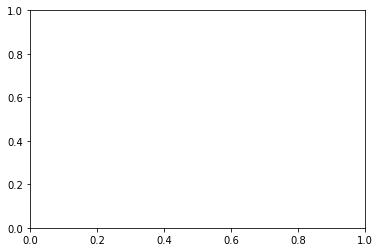

In [346]:
sns.distplot(fifa_dirty['Hits'], bins = 100)

In [338]:
fifa_dirty.Hits.plot(kind = 'hist')
#fifa_dirty.Hits

TypeError: no numeric data to plot

In [345]:
type(fifa_dirty.Hits[0])

str

In [359]:
fifa_dirty.Hits = fifa_dirty.Hits.fillna('')

In [363]:
fifa_dirty.Hits = fifa_dirty.Hits.astype('float64')

ValueError: could not convert string to float: ''

In [364]:
fifa_dirty.Hits.str.replace()

0        False
1        False
2        False
3        False
4        False
         ...  
18974    False
18975    False
18976    False
18977    False
18978    False
Name: Hits, Length: 18979, dtype: bool